#Imports 

In [1]:
import cv2
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd 
from zipfile import ZipFile
from PIL import Image
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
import seaborn as sn

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.python.client import device_lib
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading Data

In [4]:
X_data =image_dataset_from_directory(
    directory='/content/gdrive/MyDrive/data',
    image_size=(224,224),
    shuffle=True,
    labels='inferred',
    label_mode='binary', 
    color_mode='rgb',
    seed=23,
    batch_size=3262
)

Found 3262 files belonging to 2 classes.


In [5]:
for image_batch, labels_batch in X_data:
  dataX=image_batch
  dataY=np.array(labels_batch)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(dataX,dataY, test_size = 0.40)

# Benchmark

A shallow net conaing one convolution layer with actvation relu flatened 

In [ ]:
class ShallowNet:
    # create the architecture
    def build(height, width, depth, numFilters, classes):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with numFilters number of 3x3 filters
        model.add(Conv2D(numFilters, (3, 3), padding='same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

In [ ]:
trainX = trainX.astype('float32')/255.0

In [ ]:
trainY = to_categorical(trainY)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 3)       84        
                                                                 
 activation (Activation)     (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 2)                 301058    
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 301,142
Trainable params: 301,142
Non-trainable params: 0
_________________________________________________________________
None
[INFO] training network...
Epoch 1/5
13/13 [=

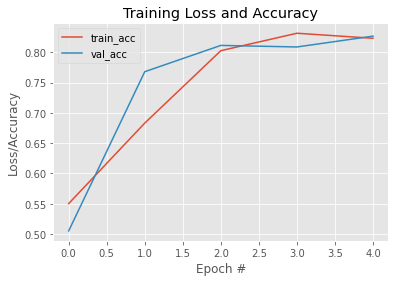

In [ ]:
model = ShallowNet.build(224, 224, 3, 3, 2)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

print("[INFO] training network...")
maxIt = 5
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure
plt.plot(np.arange(0, maxIt), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

In [ ]:
testX = testX.astype('float32')/255.0
testY = to_categorical(testY)

In [ ]:
model = ShallowNet.build(224, 224, 3, 3, 2)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
maxIt = 5
H = model.fit(testX, testY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

Epoch 1/5
33/33 [==============================] - 1s 25ms/step - loss: 1.8884 - acc: 0.6533 - val_loss: 0.3475 - val_acc: 0.8391
Epoch 2/5
33/33 [==============================] - 1s 18ms/step - loss: 0.3150 - acc: 0.8774 - val_loss: 0.2109 - val_acc: 0.9425
Epoch 3/5
33/33 [==============================] - 1s 18ms/step - loss: 0.1707 - acc: 0.9377 - val_loss: 0.1642 - val_acc: 0.9387
Epoch 4/5
33/33 [==============================] - 1s 18ms/step - loss: 0.1153 - acc: 0.9684 - val_loss: 0.1301 - val_acc: 0.9579
Epoch 5/5
33/33 [==============================] - 1s 18ms/step - loss: 0.0799 - acc: 0.9828 - val_loss: 0.1136 - val_acc: 0.9732



Testing Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98       418
           1       0.98      1.00      0.99       887

    accuracy                           0.98      1305
   macro avg       0.99      0.98      0.98      1305
weighted avg       0.98      0.98      0.98      1305


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

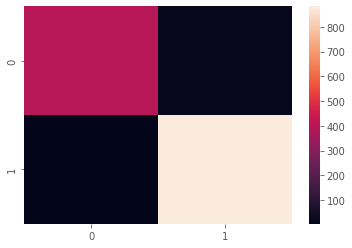

<Figure size 432x288 with 0 Axes>

In [ ]:
from seaborn import heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# predict the labels of the test set
predictedY = model.predict(testX)
#Added 
predictedY = predictedY.argmax(axis=1)
testY =testY.argmax(axis=1)

# print quality metricsl
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)
#Added
predictedY = predictedY.argmax(axis=1)
print('\nTesting Confusion Matrix:\n')

heatmap(confusion_matrix(testY, predictedY))
plt.figure()

# LeNet

In [11]:
class LeNet:
    # create the architecture
    def build(height, width, depth, classes):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same'))
        model.add(Activation('relu'))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

In [9]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

[INFO] training network...
Epoch 1/10
98/98 [==============================] - 6s 49ms/step - loss: 1.3597 - accuracy: 0.7054 - val_loss: 0.3656 - val_accuracy: 0.8418
Epoch 2/10
98/98 [==============================] - 4s 42ms/step - loss: 0.3087 - accuracy: 0.8658 - val_loss: 0.2744 - val_accuracy: 0.8903
Epoch 3/10
98/98 [==============================] - 4s 42ms/step - loss: 0.3226 - accuracy: 0.8677 - val_loss: 0.3956 - val_accuracy: 0.8087
Epoch 4/10
98/98 [==============================] - 4s 42ms/step - loss: 0.2769 - accuracy: 0.8780 - val_loss: 0.2171 - val_accuracy: 0.9209
Epoch 5/10
98/98 [==============================] - 4s 42ms/step - loss: 0.1728 - accuracy: 0.9342 - val_loss: 0.1592 - val_accuracy: 0.9413
Epoch 6/10
98/98 [==============================] - 4s 42ms/step - loss: 0.0929 - accuracy: 0.9629 - val_loss: 0.1015 - val_accuracy: 0.9541
Epoch 7/10
98/98 [==============================] - 4s 42ms/step - loss: 0.0364 - accuracy: 0.9859 - val_loss: 0.0987 - val_acc

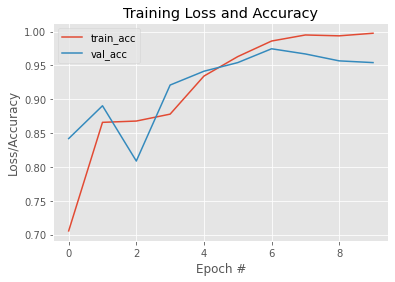

In [10]:
tf.keras.backend.clear_session()


model = LeNet.build(224, 224, 3, 2)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 16, epochs = maxIt, verbose = 1)
print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Lenet using SGD optimizer 

In [9]:
from tensorflow.keras.optimizers import SGD

## Changing learning rate 

In [7]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

In [11]:

print("[INFO] training network...")

for learning in [0.001,0.1,0.0001]:
    model = LeNet.build(224, 224, 3, 2)
    model.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning), metrics = ['accuracy'])
    maxIt = 10
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size =32, epochs = maxIt)
    print('Accuracy for differnt learning rates', learning, 'is', H.history['val_accuracy'][-1])


[INFO] training network...
Epoch 1/10
49/49 [==============================] - 5s 67ms/step - loss: 0.6539 - accuracy: 0.6767 - val_loss: 0.6492 - val_accuracy: 0.6454
Epoch 2/10
49/49 [==============================] - 2s 49ms/step - loss: 0.6127 - accuracy: 0.6984 - val_loss: 0.6110 - val_accuracy: 0.6454
Epoch 3/10
49/49 [==============================] - 2s 49ms/step - loss: 0.5723 - accuracy: 0.7342 - val_loss: 0.5717 - val_accuracy: 0.7806
Epoch 4/10
49/49 [==============================] - 2s 49ms/step - loss: 0.5337 - accuracy: 0.7591 - val_loss: 0.5804 - val_accuracy: 0.6760
Epoch 5/10
49/49 [==============================] - 2s 48ms/step - loss: 0.5075 - accuracy: 0.7725 - val_loss: 0.5313 - val_accuracy: 0.7474
Epoch 6/10
49/49 [==============================] - 2s 48ms/step - loss: 0.4891 - accuracy: 0.7783 - val_loss: 0.5283 - val_accuracy: 0.7500
Epoch 7/10
49/49 [==============================] - 2s 49ms/step - loss: 0.4935 - accuracy: 0.7706 - val_loss: 0.4962 - val_acc

#LeNet with regularization and dropuout 

In [8]:
tf.keras.backend.clear_session()


class LeNetReg:
    # create the architecture
    def build(height, width, depth, classes, lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(Dropout(dropout[2]))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        model.add(Dropout(dropout[3]))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

In [18]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)


[INFO] training network...
Epoch 1/10
13/13 [==============================] - 22s 271ms/step - loss: 4.9888 - accuracy: 0.5949 - val_loss: 0.6062 - val_accuracy: 0.6173
Epoch 2/10
13/13 [==============================] - 2s 177ms/step - loss: 0.5326 - accuracy: 0.7450 - val_loss: 0.3945 - val_accuracy: 0.8010
Epoch 3/10
13/13 [==============================] - 2s 181ms/step - loss: 0.4053 - accuracy: 0.8000 - val_loss: 0.3104 - val_accuracy: 0.8699
Epoch 4/10
13/13 [==============================] - 2s 183ms/step - loss: 0.2874 - accuracy: 0.8882 - val_loss: 0.2565 - val_accuracy: 0.8801
Epoch 5/10
13/13 [==============================] - 2s 180ms/step - loss: 0.2080 - accuracy: 0.9182 - val_loss: 0.2471 - val_accuracy: 0.8903
Epoch 6/10
13/13 [==============================] - 2s 185ms/step - loss: 0.1658 - accuracy: 0.9380 - val_loss: 0.1634 - val_accuracy: 0.9362
Epoch 7/10
13/13 [==============================] - 2s 178ms/step - loss: 0.1072 - accuracy: 0.9591 - val_loss: 0.1789 -

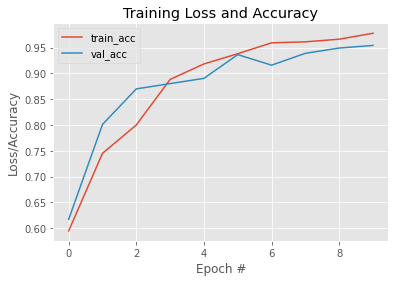

In [ ]:
tf.keras.backend.clear_session()

#((trainX, trainY), (testX, testY)) = mnist.load_data()

model = LeNetReg.build(224, 224, 3, 2)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

# print('\n Test accuracy')
# predictedY = model.predict(testX)
# predictedY = predictedY.argmax(axis=1)
# testY = testY.argmax(axis=1)
# print(classification_report(testY, predictedY))

# print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Tuning regualarization

In [ ]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

In [ ]:
tf.keras.backend.clear_session()

from sklearn.metrics import accuracy_score

best_hyperparameters = [0, 0]
best_accuracy = 0
l1=0
for l2 in [0, 0.001, 0.01, 0.1]:
          
  model = LeNetReg.build(224, 224, 3, 2, l1/trainX.shape[0], l2/trainX.shape[0])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  maxIt = 10
  H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 64, epochs = maxIt, verbose = 0)
  dev_accuracy = H.history['val_accuracy'][-1]
  print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy)
          
  if dev_accuracy > best_accuracy: best_hyperparameters = [l1, l2]



Dev accuracy for l1 = 0 , l2 = 0 is 0.954081654548645
Dev accuracy for l1 = 0 , l2 = 0.001 is 0.9515306353569031
Dev accuracy for l1 = 0 , l2 = 0.01 is 0.954081654548645
Dev accuracy for l1 = 0 , l2 = 0.1 is 0.9464285969734192


In [ ]:
tf.keras.backend.clear_session()

from sklearn.metrics import accuracy_score

#((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

best_hyperparameters = [0, 0]
best_accuracy = 0
l1=0.001
for l2 in [0, 0.001, 0.01, 0.1]:
        
  model = LeNetReg.build(224, 224, 3, 2, l1/trainX.shape[0], l2/trainX.shape[0])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  maxIt = 10
  H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 64, epochs = maxIt, verbose = 0)
  dev_accuracy = H.history['val_accuracy'][-1]
  print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy)
          
  if dev_accuracy > best_accuracy: best_hyperparameters = [l1, l2]

Dev accuracy for l1 = 0.001 , l2 = 0 is 0.9285714030265808
Dev accuracy for l1 = 0.001 , l2 = 0.001 is 0.954081654548645
Dev accuracy for l1 = 0.001 , l2 = 0.01 is 0.9413265585899353
Dev accuracy for l1 = 0.001 , l2 = 0.1 is 0.9515306353569031


In [ ]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)


In [ ]:
tf.keras.backend.clear_session()

from sklearn.metrics import accuracy_score
best_hyperparameters = [0, 0]
best_accuracy = 0

l1=0.01
for l2 in [0, 0.001, 0.01, 0.1]:
        
  model = LeNetReg.build(224, 224, 3, 2, l1/trainX.shape[0], l2/trainX.shape[0])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  maxIt = 10
  H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 64, epochs = maxIt, verbose = 0)
  dev_accuracy = H.history['val_accuracy'][-1]
  print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy)
          
  if dev_accuracy > best_accuracy: best_hyperparameters = [l1, l2]

Dev accuracy for l1 = 0.01 , l2 = 0 is 0.9413265585899353
Dev accuracy for l1 = 0.01 , l2 = 0.001 is 0.9107142686843872
Dev accuracy for l1 = 0.01 , l2 = 0.01 is 0.9464285969734192
Dev accuracy for l1 = 0.01 , l2 = 0.1 is 0.9642857313156128


In [ ]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

In [ ]:
tf.keras.backend.clear_session()

from sklearn.metrics import accuracy_score

best_hyperparameters = [0, 0]
best_accuracy = 0
l1=0.1
for l2 in [0, 0.001, 0.01, 0.1]:
        
  model = LeNetReg.build(224, 224, 3, 2, l1/trainX.shape[0], l2/trainX.shape[0])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  maxIt = 10
  H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 64, epochs = maxIt, verbose = 0)
  dev_accuracy = H.history['val_accuracy'][-1]
  print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy)
          
  if dev_accuracy > best_accuracy: best_hyperparameters = [l1, l2]

Dev accuracy for l1 = 0.1 , l2 = 0 is 0.9515306353569031
Dev accuracy for l1 = 0.1 , l2 = 0.001 is 0.9362244606018066
Dev accuracy for l1 = 0.1 , l2 = 0.01 is 0.954081654548645
Dev accuracy for l1 = 0.1 , l2 = 0.1 is 0.9668367505073547


# Dropout Tuning 

In [ ]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

In [ ]:
tf.keras.backend.clear_session()

from sklearn.metrics import accuracy_score

for dropout in [[0.3,0.3,0.5,0.8],[0.5,0.6,0.7,0.8],[0.1, 0.1, 0.1, 0.5],[0.8, 0.8, 0.8, 0.8]]:
        
    model = LeNetReg.build(224, 224, 3, 2, 0.1/trainX.shape[0], 0.1/trainX.shape[0],dropout = dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    maxIt = 10
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size =32, epochs = maxIt)
    print('Dev accuracy for dropout percentages', dropout, 'is', H.history['val_accuracy'][-1])

Epoch 1/10
49/49 [==============================] - 21s 87ms/step - loss: 1.1202 - accuracy: 0.6613 - val_loss: 0.6328 - val_accuracy: 0.6709
Epoch 2/10
49/49 [==============================] - 3s 67ms/step - loss: 0.6424 - accuracy: 0.6773 - val_loss: 0.5749 - val_accuracy: 0.6709
Epoch 3/10
49/49 [==============================] - 3s 68ms/step - loss: 0.6437 - accuracy: 0.6773 - val_loss: 0.6352 - val_accuracy: 0.6709
Epoch 4/10
49/49 [==============================] - 3s 67ms/step - loss: 0.6140 - accuracy: 0.6773 - val_loss: 0.5582 - val_accuracy: 0.7500
Epoch 5/10
49/49 [==============================] - 3s 68ms/step - loss: 0.6095 - accuracy: 0.6895 - val_loss: 0.6335 - val_accuracy: 0.6709
Epoch 6/10
49/49 [==============================] - 3s 68ms/step - loss: 0.6299 - accuracy: 0.6773 - val_loss: 0.6335 - val_accuracy: 0.6709
Epoch 7/10
49/49 [==============================] - 3s 68ms/step - loss: 0.6257 - accuracy: 0.6773 - val_loss: 0.6224 - val_accuracy: 0.6709
Epoch 8/10
4

## Observation smaller drop out result in better accuracy <br>
## Drop out tuning part 2

In [ ]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

In [ ]:
tf.keras.backend.clear_session()

from sklearn.metrics import accuracy_score

for dropout in [[0.1,0.2,0.2,0.2],[0,0.01,0.01,0.05],[0.1, 0.1, 0.1, 0.1]]:
        
    model = LeNetReg.build(224, 224, 3, 2, 0.1/trainX.shape[0], 0.1/trainX.shape[0],dropout = dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    maxIt = 10
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size =32, epochs = maxIt)
    print('Dev accuracy for dropout percentages', dropout, 'is', H.history['val_accuracy'][-1])

Epoch 1/10
49/49 [==============================] - 20s 86ms/step - loss: 1.8268 - accuracy: 0.6281 - val_loss: 0.5457 - val_accuracy: 0.6480
Epoch 2/10
49/49 [==============================] - 3s 68ms/step - loss: 0.4890 - accuracy: 0.7355 - val_loss: 0.4079 - val_accuracy: 0.7934
Epoch 3/10
49/49 [==============================] - 3s 67ms/step - loss: 0.3583 - accuracy: 0.8371 - val_loss: 0.3052 - val_accuracy: 0.8495
Epoch 4/10
49/49 [==============================] - 3s 67ms/step - loss: 0.3246 - accuracy: 0.8581 - val_loss: 0.2510 - val_accuracy: 0.8954
Epoch 5/10
49/49 [==============================] - 3s 68ms/step - loss: 0.2181 - accuracy: 0.9073 - val_loss: 0.1961 - val_accuracy: 0.9158
Epoch 6/10
49/49 [==============================] - 3s 69ms/step - loss: 0.1606 - accuracy: 0.9367 - val_loss: 0.1646 - val_accuracy: 0.9362
Epoch 7/10
49/49 [==============================] - 3s 68ms/step - loss: 0.1313 - accuracy: 0.9482 - val_loss: 0.1919 - val_accuracy: 0.9362
Epoch 8/10
4

# Test with best dropout and regularization values

[INFO] training network...
Epoch 1/10
13/13 [==============================] - 7s 262ms/step - loss: 5.6269 - accuracy: 0.6498 - val_loss: 0.8619 - val_accuracy: 0.6913
Epoch 2/10
13/13 [==============================] - 2s 181ms/step - loss: 0.8376 - accuracy: 0.6958 - val_loss: 0.7586 - val_accuracy: 0.7474
Epoch 3/10
13/13 [==============================] - 2s 180ms/step - loss: 0.7624 - accuracy: 0.7195 - val_loss: 0.6913 - val_accuracy: 0.7679
Epoch 4/10
13/13 [==============================] - 2s 181ms/step - loss: 0.6920 - accuracy: 0.7470 - val_loss: 0.6780 - val_accuracy: 0.7806
Epoch 5/10
13/13 [==============================] - 2s 182ms/step - loss: 0.6379 - accuracy: 0.7904 - val_loss: 0.6223 - val_accuracy: 0.8138
Epoch 6/10
13/13 [==============================] - 2s 180ms/step - loss: 0.5812 - accuracy: 0.8064 - val_loss: 0.5632 - val_accuracy: 0.8240
Epoch 7/10
13/13 [==============================] - 2s 181ms/step - loss: 0.5147 - accuracy: 0.8562 - val_loss: 0.5134 - 

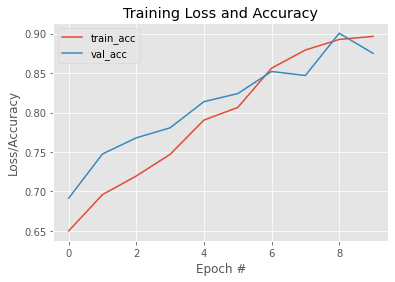

In [10]:
tf.keras.backend.clear_session()


model = LeNetReg.build(224, 224, 3, 2,0.1/trainX.shape[0], 0.1/trainX.shape[0],[0.1,0.2,0.2,0.2])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Changing architecture

## additional fully connected layer 

In [7]:
tf.keras.backend.clear_session()
 

class LeNetReg:
    # create the architecture
    def build(height, width, depth, classes, lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(Dropout(dropout[2]))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        

        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))

        model.add(Dropout(dropout[3]))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

[INFO] training network...
Epoch 1/10
13/13 [==============================] - 3s 212ms/step - loss: 6.8396 - accuracy: 0.5668 - val_loss: 0.8740 - val_accuracy: 0.6913
Epoch 2/10
13/13 [==============================] - 2s 181ms/step - loss: 0.8295 - accuracy: 0.7048 - val_loss: 0.8163 - val_accuracy: 0.7347
Epoch 3/10
13/13 [==============================] - 2s 181ms/step - loss: 0.7148 - accuracy: 0.7693 - val_loss: 0.7053 - val_accuracy: 0.7449
Epoch 4/10
13/13 [==============================] - 2s 182ms/step - loss: 0.6366 - accuracy: 0.7968 - val_loss: 0.8337 - val_accuracy: 0.7653
Epoch 5/10
13/13 [==============================] - 2s 180ms/step - loss: 0.5809 - accuracy: 0.8390 - val_loss: 0.5291 - val_accuracy: 0.8444
Epoch 6/10
13/13 [==============================] - 2s 184ms/step - loss: 0.4865 - accuracy: 0.8684 - val_loss: 0.4522 - val_accuracy: 0.9005
Epoch 7/10
13/13 [==============================] - 2s 182ms/step - loss: 0.4212 - accuracy: 0.9163 - val_loss: 0.4356 - 

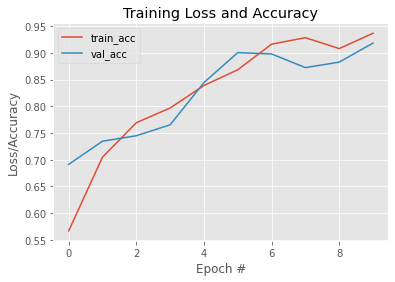

In [12]:
tf.keras.backend.clear_session()

model = LeNetReg.build(224, 224, 3, 2,0.1/trainX.shape[0], 0.1/trainX.shape[0],[0.1,0.2,0.2,0.2])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

# print('\n Test accuracy')
# predictedY = model.predict(testX)
# predictedY = predictedY.argmax(axis=1)
# testY = testY.argmax(axis=1)
# print(classification_report(testY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## changing optimizer used

[INFO] training network...
Epoch 1/10
13/13 [==============================] - 4s 239ms/step - loss: 0.9369 - accuracy: 0.6447 - val_loss: 0.9086 - val_accuracy: 0.6913
Epoch 2/10
13/13 [==============================] - 3s 206ms/step - loss: 0.8915 - accuracy: 0.6780 - val_loss: 0.8558 - val_accuracy: 0.6913
Epoch 3/10
13/13 [==============================] - 3s 208ms/step - loss: 0.8318 - accuracy: 0.7297 - val_loss: 0.8706 - val_accuracy: 0.6913
Epoch 4/10
13/13 [==============================] - 3s 207ms/step - loss: 0.7941 - accuracy: 0.7521 - val_loss: 0.8726 - val_accuracy: 0.7015
Epoch 5/10
13/13 [==============================] - 3s 209ms/step - loss: 0.7769 - accuracy: 0.7655 - val_loss: 0.7526 - val_accuracy: 0.7883
Epoch 6/10
13/13 [==============================] - 3s 206ms/step - loss: 0.7427 - accuracy: 0.7744 - val_loss: 0.7545 - val_accuracy: 0.7653
Epoch 7/10
13/13 [==============================] - 3s 206ms/step - loss: 0.7324 - accuracy: 0.7751 - val_loss: 0.7433 - 

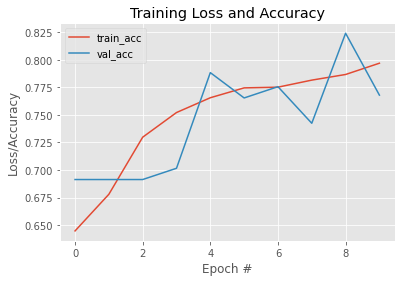

In [13]:
tf.keras.backend.clear_session()

opt=SGD(learning_rate=0.001,decay=0.1/100,momentum=0.9,nesterov=True)

model = LeNetReg.build(224, 224, 3, 2,0.1/trainX.shape[0], 0.1/trainX.shape[0],[0.1,0.2,0.2,0.2])
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

# print('\n Test accuracy')
# predictedY = model.predict(testX)
# predictedY = predictedY.argmax(axis=1)
# testY = testY.argmax(axis=1)
# print(classification_report(testY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Adding another convolution layer

In [8]:
tf.keras.backend.clear_session()

class LeNetReg:
    # create the architecture
    def build(height, width, depth, classes, lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(Dropout(dropout[2]))

        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(256, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        

        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))

        model.add(Dropout(dropout[3]))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

[INFO] training network...
Epoch 1/10
13/13 [==============================] - 9s 353ms/step - loss: 3.5548 - accuracy: 0.6217 - val_loss: 1.2711 - val_accuracy: 0.6633
Epoch 2/10
13/13 [==============================] - 3s 212ms/step - loss: 1.1684 - accuracy: 0.7246 - val_loss: 1.0975 - val_accuracy: 0.7347
Epoch 3/10
13/13 [==============================] - 3s 211ms/step - loss: 1.0031 - accuracy: 0.7776 - val_loss: 0.9819 - val_accuracy: 0.7704
Epoch 4/10
13/13 [==============================] - 3s 212ms/step - loss: 0.8921 - accuracy: 0.8192 - val_loss: 0.9213 - val_accuracy: 0.8138
Epoch 5/10
13/13 [==============================] - 3s 210ms/step - loss: 0.8041 - accuracy: 0.8601 - val_loss: 0.8137 - val_accuracy: 0.8571
Epoch 6/10
13/13 [==============================] - 3s 211ms/step - loss: 0.7198 - accuracy: 0.8843 - val_loss: 0.7383 - val_accuracy: 0.8929
Epoch 7/10
13/13 [==============================] - 3s 210ms/step - loss: 0.7014 - accuracy: 0.8856 - val_loss: 0.7939 - 

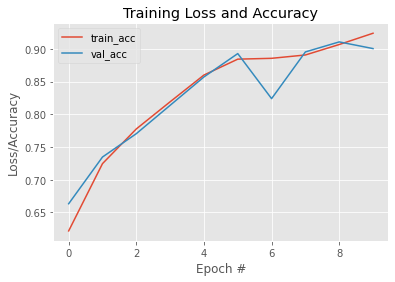

In [10]:
tf.keras.backend.clear_session()

#((trainX, trainY), (testX, testY)) = mnist.load_data()

model = LeNetReg.build(224, 224, 3, 2,0.1/trainX.shape[0], 0.1/trainX.shape[0],[0.1,0.2,0.2,0.2])
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

# print('\n Test accuracy')
# predictedY = model.predict(testX)
# predictedY = predictedY.argmax(axis=1)
# testY = testY.argmax(axis=1)
# print(classification_report(testY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Test on network that obtained the best accuracy 

In [8]:

trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

[INFO] training network...
Epoch 1/10
49/49 [==============================] - 20s 88ms/step - loss: 2.2509 - accuracy: 0.6626 - val_loss: 0.7612 - val_accuracy: 0.6709
Epoch 2/10
49/49 [==============================] - 3s 68ms/step - loss: 0.7058 - accuracy: 0.7444 - val_loss: 0.6298 - val_accuracy: 0.7908
Epoch 3/10
49/49 [==============================] - 3s 68ms/step - loss: 0.5341 - accuracy: 0.8479 - val_loss: 0.5645 - val_accuracy: 0.8214
Epoch 4/10
49/49 [==============================] - 3s 68ms/step - loss: 0.4616 - accuracy: 0.8812 - val_loss: 0.4441 - val_accuracy: 0.8776
Epoch 5/10
49/49 [==============================] - 3s 68ms/step - loss: 0.4095 - accuracy: 0.9105 - val_loss: 0.4052 - val_accuracy: 0.8827
Epoch 6/10
49/49 [==============================] - 3s 67ms/step - loss: 0.3214 - accuracy: 0.9374 - val_loss: 0.3503 - val_accuracy: 0.9235
Epoch 7/10
49/49 [==============================] - 3s 68ms/step - loss: 0.2715 - accuracy: 0.9565 - val_loss: 0.3261 - val_ac

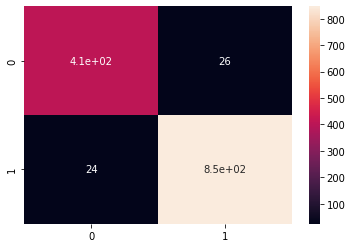

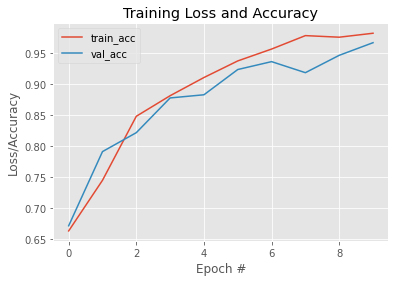

In [9]:
tf.keras.backend.clear_session()

model = LeNetReg.build(224, 224, 3, 2,0.1/trainX.shape[0], 0.1/trainX.shape[0],[0.1,0.2,0.2,0.2])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 10
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 32, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)
print(classification_report(testY, predictedY))

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()